<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part II
              
</p>
</div>

Data Science Cohort Live NYC Aug 2024
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The normal distribution
- Why do people care so much about this distribution?

Sum of N independent, random variables each following same distribution:

$$ S = X_1 + X_2 + ... + X_N $$

- Each having same mean, variance, etc.
- **S** is a composite variable.

Let each $X_i$ be the result of a Bernoulli trial:

<img src = "Images/simple_bernoulli.png" width = 500>

- $S$ would be how many steps right under $N$ trials.
- What kind of distribution?

Binomial!
3 trials.

In [21]:
from scipy.stats import binom
import matplotlib.pyplot as plt
N = 3
p = 0.5

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(0,10)]

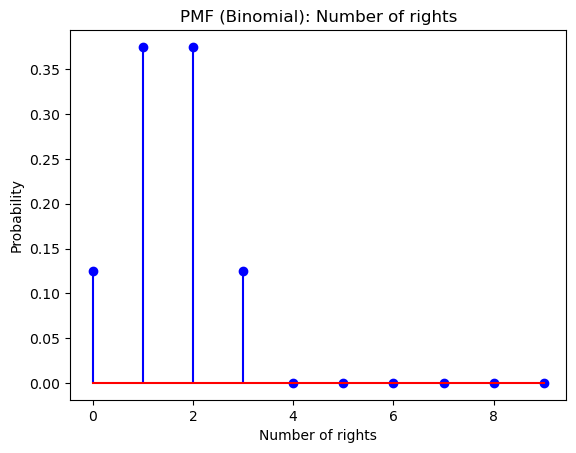

In [2]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()

Plot it for actual distance deviation:

$$ d = n_R - n_L = n_R - (N-n_r)$$

In [22]:
import numpy as np
N = 3
p = 0.5

pmf_deviation = [(x - (N - x), binom.pmf(x, n = N, p = p)) 
                for x in np.arange(-5,5,1)]

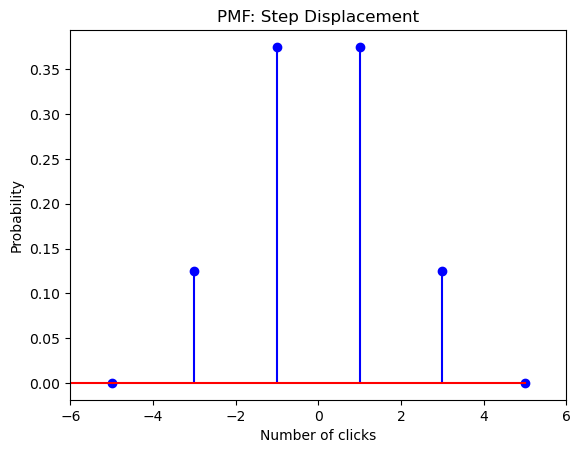

In [4]:
x,y = list(zip(*pmf_deviation))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF: Step Displacement')
plt.xlim(-6,6)
plt.show()

When $N$ gets sufficiently big:

In [23]:
from IPython.display import YouTubeVideo

galton_video = YouTubeVideo('TwctT3Ncm1w', width = 800, height = 600)

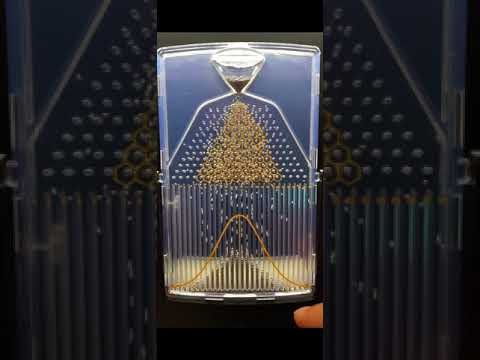

In [24]:
display(galton_video)

- If make slits finer, and $N \rightarrow \infty$ :
- Becomes the continuous normal pdf.

$$ S = X_1 + X_2 + ... + X_N $$ 

follows normal distribution provided that each $X_i$:
- follows a population distribution:
    - Finite variance.
    - Defined mean.



**Most distributions satisfying weak requirements**:

Bernoulli was an underlying distribution that satisfied this.

Sum of random variables drawn from these distribution follows normal distribution as N goes large.

This is underneath why binomial approaches normal as $ N $ gets large:

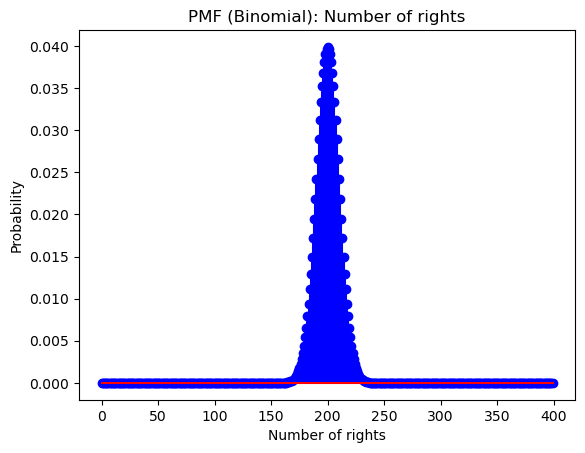

In [7]:
import numpy as np
N = 400
p = 0.5

pmf_largeN = [(x, binom.pmf(x, n = N, p = p)) 
                for x in np.arange(0, N)]

x,y = list(zip(*pmf_largeN))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()


#### Known as: The central limit theorem

Take N = 50 samples of waiting times of drivers at a toll:

- Follows exponential distribution with average wait time $\tau$
- Has finite variance $\tau^2$.

In [26]:
from scipy.stats import expon

#assume population mean 3 minutes
pop_mean = 3

wait_time_sample = expon.rvs(scale = pop_mean, size = 50)

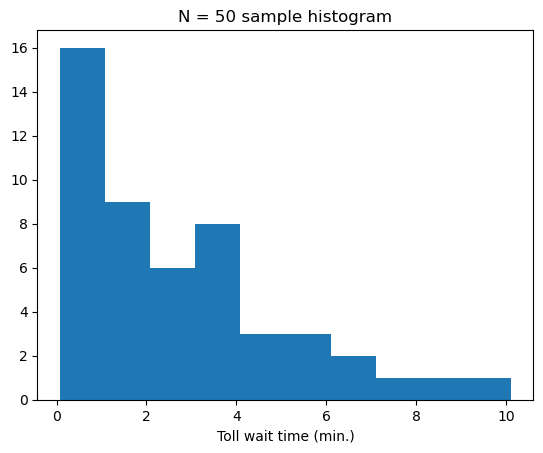

In [27]:
plt.hist(wait_time_sample)
plt.xlabel('Count')
plt.xlabel('Toll wait time (min.)')
plt.title('N = 50 sample histogram')
plt.show()


Obviously, not normal distributed.

- Want statistics/uncertainty of the **sample mean** as we repeat for many trials of samples with N = 50.

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

- Here N = 50
- Apart from factor of (1/N), this is a sum of random variables!

##### Create a list of 10,000 trials of these N = 50 samples from exponential distribution:
- get $N = 50$ sample
- get mean of times in small sample (this is a statistic $\bar{T}$)
- Do this 10,000 times

In [34]:
pop_mean = 3
many_sample_trials = [expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 40) for trial in range(10000)]
many_sample_trials[0:2]

[array([3.48110978, 1.68761207, 2.66280249, 1.66620933, 2.09595469,
        3.00291078, 1.68476527, 2.55083605, 1.5276286 , 1.55314904,
        3.41300897, 3.57398432, 1.76842105, 2.94997706, 4.54188955,
        2.01146873, 1.98570603, 2.48754323, 1.51401297, 1.72030053,
        3.45733594, 6.05704436, 2.21089146, 2.77568608, 3.44719139,
        3.60188674, 3.3785806 , 4.23386533, 4.67123252, 1.80386268,
        2.88586392, 1.56917535, 1.70891761, 1.57956212, 2.07187428,
        2.50243014, 2.51015081, 2.38629094, 2.50732313, 2.10321204]),
 array([1.61897872, 5.43864712, 5.27074461, 2.3522973 , 1.67359736,
        1.50649433, 2.26397631, 1.98587126, 5.26166852, 4.28357978,
        1.58301303, 2.12783399, 1.53977302, 4.6756166 , 5.08512241,
        1.88544324, 1.56325767, 4.57669046, 2.93480809, 2.85723262,
        2.29490388, 5.4173392 , 1.97773486, 7.69240304, 2.16528247,
        3.26868664, 1.75736907, 7.20711551, 1.78128513, 2.50004776,
        1.71429492, 2.44815487, 1.66147973, 2.

Return list of 10,000 sample means:

In [35]:
sample_mean_list = [sample.mean() for sample in many_sample_trials]
len(sample_mean_list)
sample_mean_list

[2.6335416996215004,
 3.0267861702001166,
 2.935652694293734,
 2.924310277150324,
 3.0623535353226727,
 2.9937451492477054,
 3.1658819896086845,
 2.9707233122426033,
 2.7662889611077097,
 2.7861002954572007,
 2.964649690658643,
 3.0262533550843376,
 2.9627006919869077,
 2.8845923056127893,
 2.972597348254749,
 2.9561899862931105,
 3.2575626403587514,
 2.6057421344462135,
 3.2928438848984145,
 2.880852848173923,
 2.824845276721143,
 3.378017933827774,
 3.218697661787643,
 2.556288323106722,
 2.745062087658398,
 2.9472496637495,
 3.044286709239812,
 3.2599193764598544,
 3.068562849749722,
 3.0322086118455673,
 2.7762357291418396,
 3.0180134833499896,
 3.124666996007027,
 2.9521839421546585,
 3.045409968547245,
 3.0589140877140535,
 3.1365312214531027,
 2.978866544506245,
 2.9211560446028138,
 3.480759549312509,
 2.91112326980454,
 3.341571373908703,
 3.0003221469568784,
 3.3543055904869687,
 2.9989752757062242,
 2.694235402975791,
 3.0202355903867177,
 3.215179712317301,
 2.8238778491040

What does the distribution of means look like?

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

Note: mean is sum of random variables drawn from exponential distribution up to a factor

Construct histogram of $\bar{T}$:

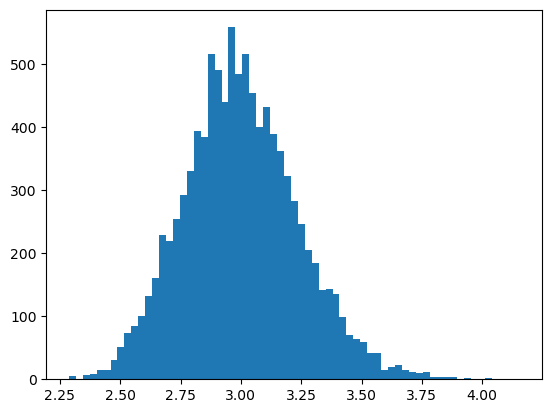

In [36]:
plt.hist(sample_mean_list, bins = "auto")
plt.show()

**The distribution of mean of a sample follow normal distribution**

- Regardless of underlying population distribution.

This is a very large reason why normal distribution is so important!

#### Standard Normal Distribution

- Often useful to rescale normal by mean/std.
- New rescaled normal has mean of 0 and variance of 1.
- Z-distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$z = \frac{x - \mu}{\sigma}$$

We call this process **standardization**.

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

Scaled transformation:
$$ \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### $z$-Score: why this transformation is useful

A **$z$-score** for a data point $x$ (in a normal distribution) is simply the distance to the mean in units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

Transforming observations on original scale to z-score:
- we can see how unlikely a value is. 
- i.e. how many stds away from center of normal

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### The Empirical Rule

- $68\%$ of the values of a normal distribution: lie within 1 standard deviation ($\sigma$) of the mean.
- $95\%$ within $2\sigma$.
- $99.7\%$ within $3\sigma$.  

#### Using .cdf to get empirical rule:

Instead of looking at empirical rule, get probability given z-score:

I have $X$ distributed normally with mean 5 and standard deviation 2:
- How many standard deviations from center of distribution is $X = 9$?
- What percentage of the values lie within a range $X = 1$ and $X=9$?


In [39]:
# z-score
z = (9 - 5)/2
z

2.0

In [40]:
# calculate z-score:
z_score = (1 - 5)/2
z_score

-2.0

Now want $$ P(- Z^* <= z <= Z^* ) $$

which will compute empirical rule

Using the cdf:

In [42]:
from scipy.stats import norm
# using cdf: probability in an interval
empirical_rule = norm.cdf(z) - norm.cdf(- z) 
# with z-score we can use standardized normal form

empirical_rule

0.9544997361036416

I have $X$ distributed normally with mean 5 and standard deviation 2:
- What percentage of the values lie within a range $X = -1.2$ to $11.2$?

In [43]:
# calculate z-scores, use cdf

z_score = (11.2 - 5)/2


In [44]:
z_1 = (11.2 - 5)/2
z_2 = (-1.2 - 5)/2

norm.cdf(z_1) - norm.cdf(z_2)

0.9980647935735634

I have $X$ distributed normally with mean 5. Standard deviations take on 1, 3 and 5:
- What percentage of the values lie within a range $X = \pm 11.2$ for each standard deviation?

In [46]:
# calculate list of z-scores, use cdf to calculate list of percentages.
for i in range(1,6,2):
    z_score  = (11.2 - 5)/i
    print('Percentage of values of std deviation '+str(i)+' is')
    # print(f"Percentage of values of std deviation {z_score}") (f string)
    print(norm.cdf(z_score)-norm.cdf(-z_score))

Percentage of values of std deviation 1 is
0.9999999994353683
Percentage of values of std deviation 3 is
0.9612344258223628
Percentage of values of std deviation 5 is
0.7850246058508261


In [47]:
list(range(1,6,2))

[1, 3, 5]